## Forecasting Unit Sales (Task 1)

 Install Required Libraries

In [21]:
pip install pandas matplotlib seaborn scikit-learn statsmodels xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [22]:
import pandas as pd


Correct Data Paths

In [23]:
train_df = pd.read_csv('train.csv')  # Update with your actual path
test_df = pd.read_csv('test.csv')    # Update with your actual path


In [24]:
print("Train Data:", train_df.head(), sep="\n")
print("Test Data:", test_df.head(), sep="\n")


Train Data:
                      ID        date     Item Id  \
0  2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   

   units  unit_price  
0    0.0         0.0  
1    0.0         0.0  
2    0.0         0.0  
3    0.0         0.0  
4    0.0         0.0  
Test Data:
                      ID        date     Item Id  \
0  2024-07-01_B09

Inspect Data

In [25]:
print("Train Data Info:", train_df.info(), sep="\n")
print("Missing Values in Train Data:", train_df.isnull().sum(), sep="\n")
print("Test Data Info:", test_df.info(), sep="\n")
print("Missing Values in Test Data:", test_df.isnull().sum(), sep="\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB
Train Data Info:
None
Missing Values in Train Data:
ID                0
date              0
Item Id           2
Item Name      1832
ad_spend      24187
anarix_id         0
units         17898
unit_price        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   

Convert Date Columns

In [26]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])


In [27]:
sample_item_ids = train_df['Item Id'].unique()[:5]


Plotting Time Series

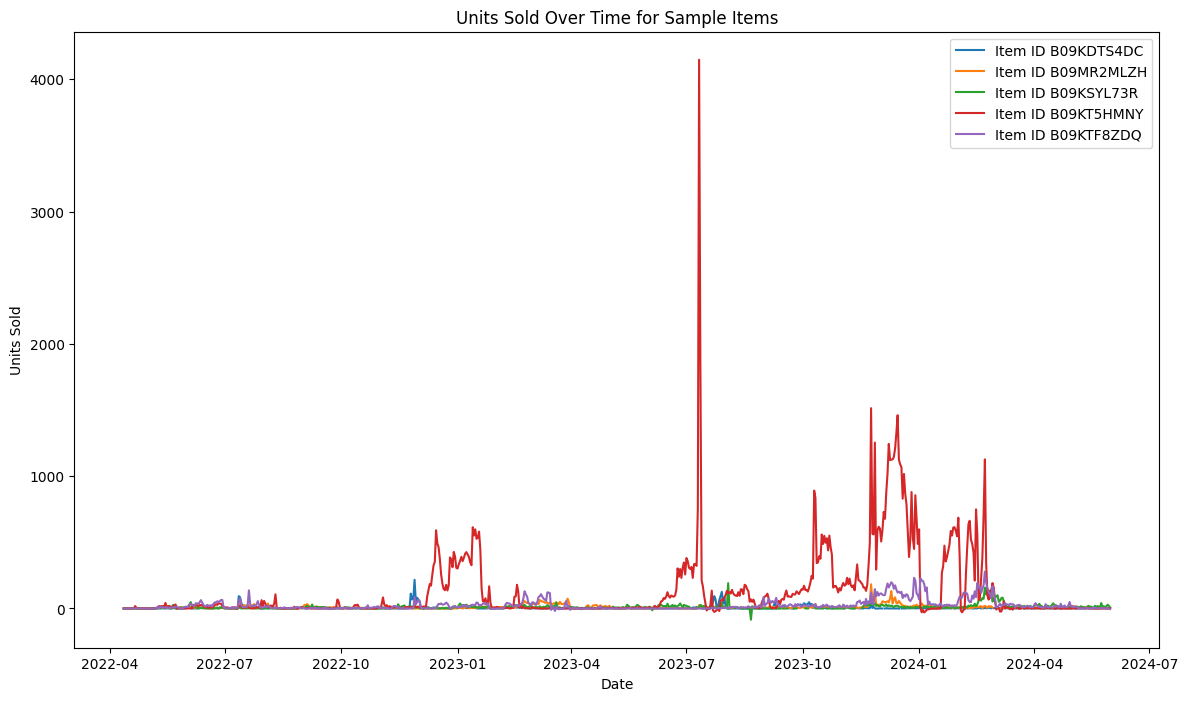

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
for item_id in sample_item_ids:
    item_data = train_df[train_df['Item Id'] == item_id]
    plt.plot(item_data['date'], item_data['units'], label=f'Item ID {item_id}')
plt.title('Units Sold Over Time for Sample Items')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()


In [29]:
print("Columns in Train Data:", train_df.columns, sep="\n")


Columns in Train Data:
Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price'],
      dtype='object')


Correlation Matrix

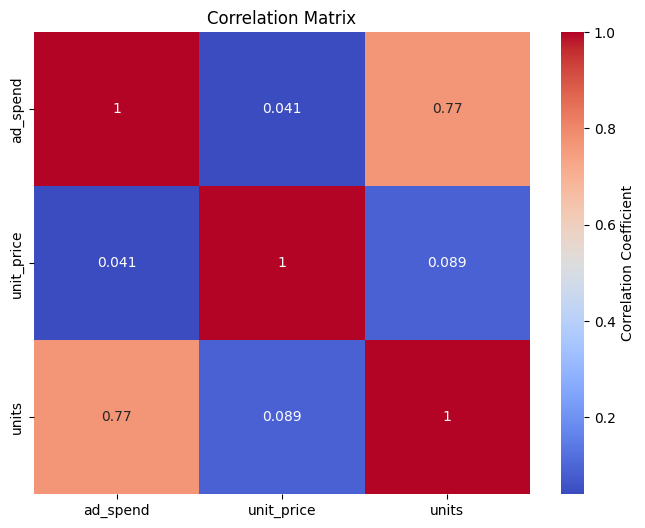

In [30]:
import seaborn as sns
columns_for_correlation = ['ad_spend', 'unit_price', 'units']
correlation_matrix = train_df[columns_for_correlation].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()


Time-Based Features

In [31]:
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year
train_df['day_of_month'] = train_df['date'].dt.day
train_df['week_of_year'] = train_df['date'].dt.isocalendar().week

test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['month'] = test_df['date'].dt.month
test_df['year'] = test_df['date'].dt.year
test_df['day_of_month'] = test_df['date'].dt.day
test_df['week_of_year'] = test_df['date'].dt.isocalendar().week

print("Train Data with Time-Based Features:", train_df.head(), sep="\n")
print("Test Data with Time-Based Features:", test_df.head(), sep="\n")


Train Data with Time-Based Features:
                      ID       date     Item Id  \
0  2022-04-12_B09KDTS4DC 2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH 2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R 2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY 2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ 2022-04-12  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   

   units  unit_price  day_of_week  month  year  day_of_month  week_of_year  
0    0.0         0.0            1      4  2022            12            15  
1    0.0         0.0            1      4  202

Lag and Rolling Features

In [32]:
for lag in range(1, 8):
    train_df[f'lag_{lag}'] = train_df.groupby('Item Id')['units'].shift(lag)

train_df['rolling_mean_7'] = train_df.groupby('Item Id')['units'].transform(lambda x: x.rolling(window=7).mean())
train_df['rolling_sum_7'] = train_df.groupby('Item Id')['units'].transform(lambda x: x.rolling(window=7).sum())

train_df_cleaned = train_df.dropna()
print("Train Data with Lag Features:", train_df.head(10), sep="\n")
print("Train Data with Rolling Statistics:", train_df.head(10), sep="\n")


Train Data with Lag Features:
                      ID       date     Item Id  \
0  2022-04-12_B09KDTS4DC 2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH 2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R 2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY 2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ 2022-04-12  B09KTF8ZDQ   
5  2022-04-12_B09KTJRHC7 2022-04-12  B09KTJRHC7   
6  2022-04-12_B09KTMKDKJ 2022-04-12  B09KTMKDKJ   
7  2022-04-12_B09KTMLQ1N 2022-04-12  B09KTMLQ1N   
8  2022-04-12_B09MR5WS3Y 2022-04-12  B09MR5WS3Y   
9  2022-04-12_B09KSXP3HN 2022-04-12  B09KSXP3HN   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4     NapQueen Elsa 6" Inner

Model Preparation

In [33]:
features = [
    'ad_spend', 'unit_price', 'day_of_week', 'month', 'year', 'day_of_month', 'week_of_year',
    'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
    'rolling_mean_7', 'rolling_sum_7'
]
target = 'units'

X_train = train_df_cleaned[features]
y_train = train_df_cleaned[target]
print("Features used for training:", X_train.head(), sep="\n")


Features used for training:
      ad_spend  unit_price  day_of_week  month  year  day_of_month  \
5261      0.00         0.0            5      8  2022             6   
5263     44.46         0.0            5      8  2022             6   
5265      0.00         0.0            5      8  2022             6   
5266      7.47         0.0            5      8  2022             6   
5267   1187.33         0.0            5      8  2022             6   

      week_of_year  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  \
5261            31    0.0    0.0    0.0    2.0    0.0    0.0    0.0   
5263            31    1.0    2.0    0.0    0.0    0.0    2.0    0.0   
5265            31    3.0    5.0    7.0    6.0    4.0    3.0    2.0   
5266            31    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267            31   -1.0    0.0    1.0    0.0    0.0    0.0    0.0   

      rolling_mean_7  rolling_sum_7  
5261        0.428571            3.0  
5263        0.857143            6.0  
5265      

## Baseline and Advanced Models

In [34]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)


In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def moving_average_forecast(series, window_size):
    return series.rolling(window=window_size).mean()

window_size = 7
y_train_baseline = moving_average_forecast(y_train, window_size).shift(1).dropna()
y_train_aligned = y_train.iloc[len(y_train) - len(y_train_baseline):]
mse_baseline = mean_squared_error(y_train_aligned, y_train_baseline)
print(f"Baseline Model MSE: {mse_baseline:.2f}")


Baseline Model MSE: 7915.65


## ARIMA Model

In [36]:
from statsmodels.tsa.arima.model import ARIMA
arima_order = (5, 1, 0)
arima_model = ARIMA(y_train, order=arima_order)
arima_fit = arima_model.fit()
y_train_arima = arima_fit.predict(start=window_size, end=len(y_train)-1)
mse_arima = mean_squared_error(y_train.iloc[window_size:], y_train_arima)
print(f"ARIMA Model MSE: {mse_arima:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model MSE: 8045.14


## Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_rf = rf_model.predict(X_train)
mse_rf = mean_squared_error(y_train, y_train_rf)
print(f"Random Forest Model MSE: {mse_rf:.2f}")


Random Forest Model MSE: 152.95


##  XGBoost Model

In [38]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
y_train_xgb = xgb_model.predict(X_train)
mse_xgb = mean_squared_error(y_train, y_train_xgb)
print(f"XGBoost Model MSE: {mse_xgb:.2f}")


XGBoost Model MSE: 856.92


Comparision of MSE values of the models

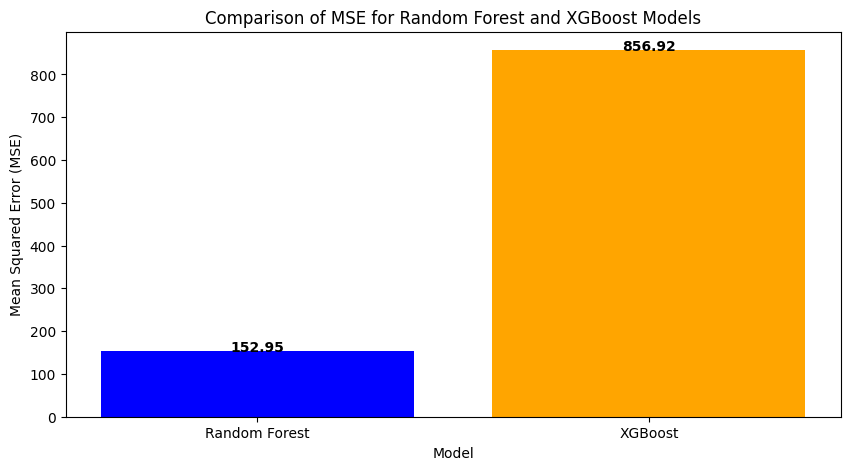

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# MSE values for the different models
mse_values = [mse_rf, mse_xgb]
models = ['Random Forest', 'XGBoost']

# Plotting the MSE values
plt.figure(figsize=(10, 5))

# Bar plot for MSE comparison
plt.bar(models, mse_values, color=['blue', 'orange'])

# Adding title and labels
plt.title('Comparison of MSE for Random Forest and XGBoost Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')

# Adding value labels on top of the bars
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

# Display the plot
plt.show()


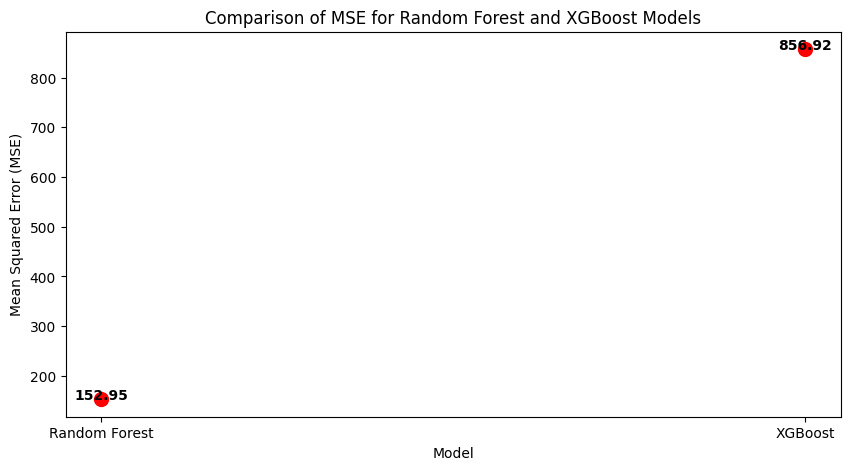

In [40]:
import matplotlib.pyplot as plt

# Scatter plot for MSE comparison
plt.figure(figsize=(10, 5))
plt.scatter(models, mse_values, color='red', s=100)

# Adding title and labels
plt.title('Comparison of MSE for Random Forest and XGBoost Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')

# Adding value labels on the plot
for i, v in enumerate(mse_values):
    plt.text(i, v, f"{v:.2f}", ha='center', fontweight='bold')

# Display the plot
plt.show()


## Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

# Random Forest Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# XGBoost Grid Search
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_


## Forecasting and Submission

In [63]:
X_test_dropna = X_test.dropna()  # Drops rows with any missing values

# Now use X_test_dropna for prediction (but be mindful of the reduced sample size)
y_test_rf = best_rf_model.predict(X_test_dropna)
import pandas as pd
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data (important to avoid data leakage)
imputer.fit(X_train)  # Assuming X_train is your training data

# Transform both training and test data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now use X_test_imputed for prediction
y_test_rf = best_rf_model.predict(X_test_imputed)

submission_rf = test_df[['Item Id', 'date']].copy()
submission_rf['predicted_units'] = y_test_rf
submission_rf.to_csv('random_forest_predictions.csv', index=False)

submission_xgb = test_df[['Item Id', 'date']].copy()
submission_xgb['predicted_units'] = y_test_xgb
submission_xgb.to_csv('xgboost_predictions.csv', index=False)

print("Predictions saved to 'random_forest_predictions.csv' and 'xgboost_predictions.csv'.")



Predictions saved to 'random_forest_predictions.csv' and 'xgboost_predictions.csv'.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Comparision of the predicted_units values

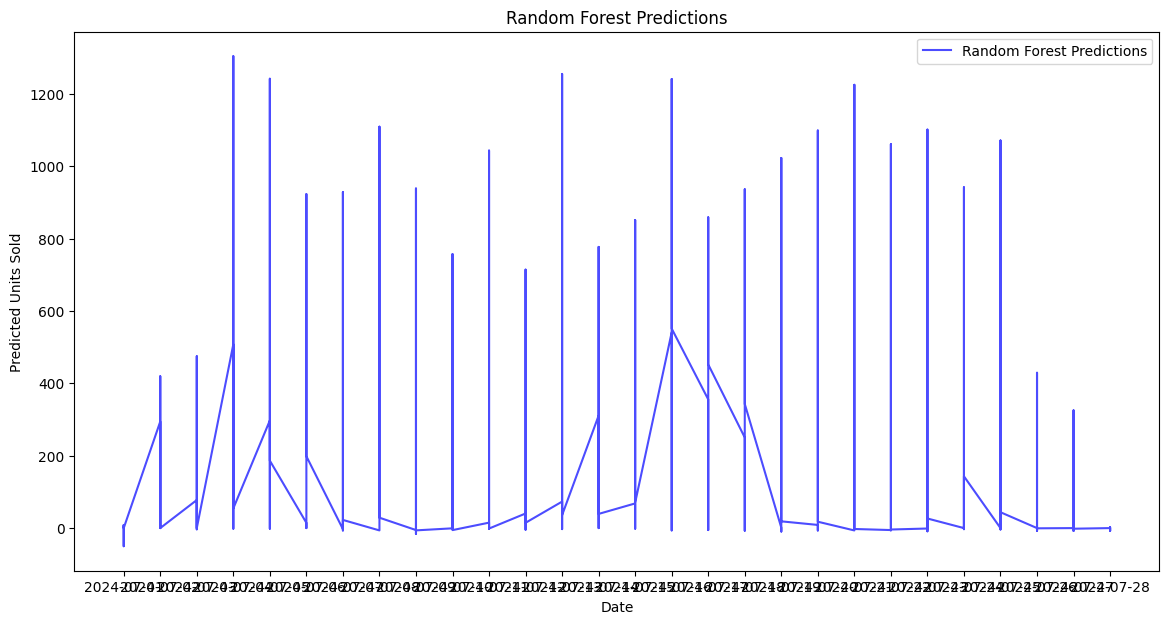

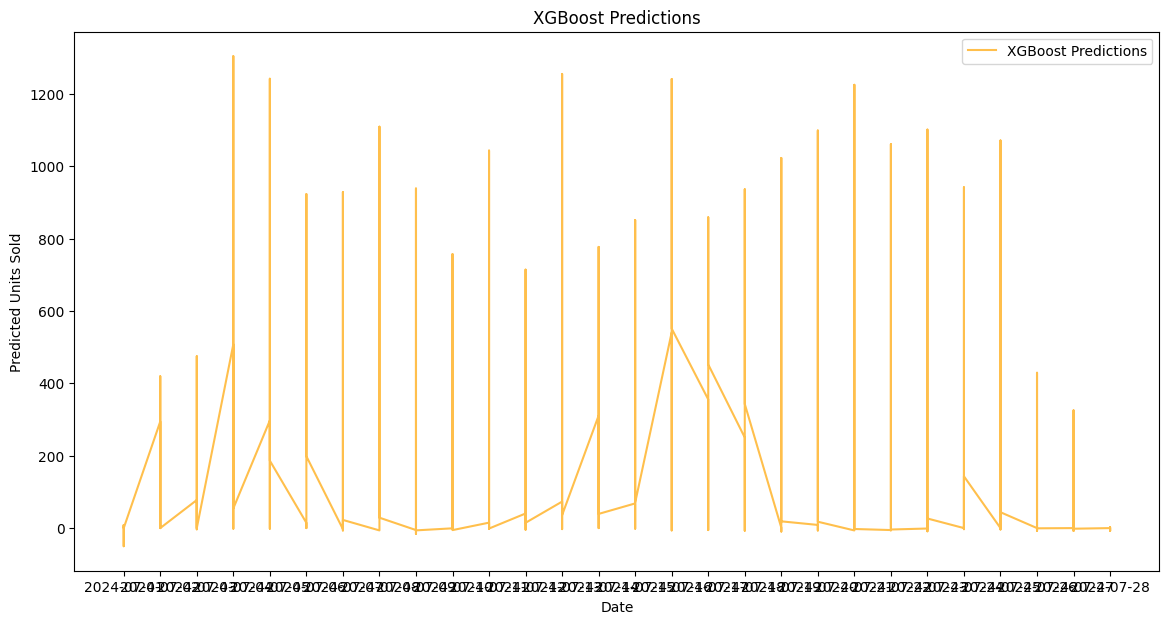

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the predictions
rf_predictions = pd.read_csv('random_forest_predictions.csv')
xgb_predictions = pd.read_csv('xgboost_predictions.csv')

# Ensure the data is sorted by date for proper comparison
rf_predictions = rf_predictions.sort_values(by=['date', 'Item Id'])
xgb_predictions = xgb_predictions.sort_values(by=['date', 'Item Id'])

# Plot Random Forest predictions
plt.figure(figsize=(14, 7))
plt.plot(rf_predictions['date'], rf_predictions['predicted_units'], label='Random Forest Predictions', alpha=0.7, color='blue')
plt.title('Random Forest Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Units Sold')
plt.legend()
plt.show()

# Plot XGBoost predictions
plt.figure(figsize=(14, 7))
plt.plot(xgb_predictions['date'], xgb_predictions['predicted_units'], label='XGBoost Predictions', alpha=0.7, color='orange')
plt.title('XGBoost Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Units Sold')
plt.legend()
plt.show()


In [14]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
rf_predictions = pd.read_csv('random_forest_predictions.csv')
xgb_predictions = pd.read_csv('xgboost_predictions.csv')

# Display the first few rows of each dataset
print("Train Data:")
print(train_df.head())

print("\nRandom Forest Predictions:")
print(rf_predictions.head())

print("\nXGBoost Predictions:")
print(xgb_predictions.head())


Train Data:
                      ID        date     Item Id  \
0  2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   

   units  unit_price  
0    0.0         0.0  
1    0.0         0.0  
2    0.0         0.0  
3    0.0         0.0  
4    0.0         0.0  

Random Forest Predictions:
      Item Id        date  predicted_units
0  B09KDR

## Check the unique values

In [15]:
# Check unique values in 'date' and 'Item Id' columns
print("\nUnique dates in Train Data:", train_df['date'].nunique())
print("Unique Item Ids in Train Data:", train_df['Item Id'].nunique())

print("\nUnique dates in Random Forest Predictions:", rf_predictions['date'].nunique())
print("Unique Item Ids in Random Forest Predictions:", rf_predictions['Item Id'].nunique())

print("\nUnique dates in XGBoost Predictions:", xgb_predictions['date'].nunique())
print("Unique Item Ids in XGBoost Predictions:", xgb_predictions['Item Id'].nunique())



Unique dates in Train Data: 781
Unique Item Ids in Train Data: 217

Unique dates in Random Forest Predictions: 28
Unique Item Ids in Random Forest Predictions: 155

Unique dates in XGBoost Predictions: 28
Unique Item Ids in XGBoost Predictions: 155


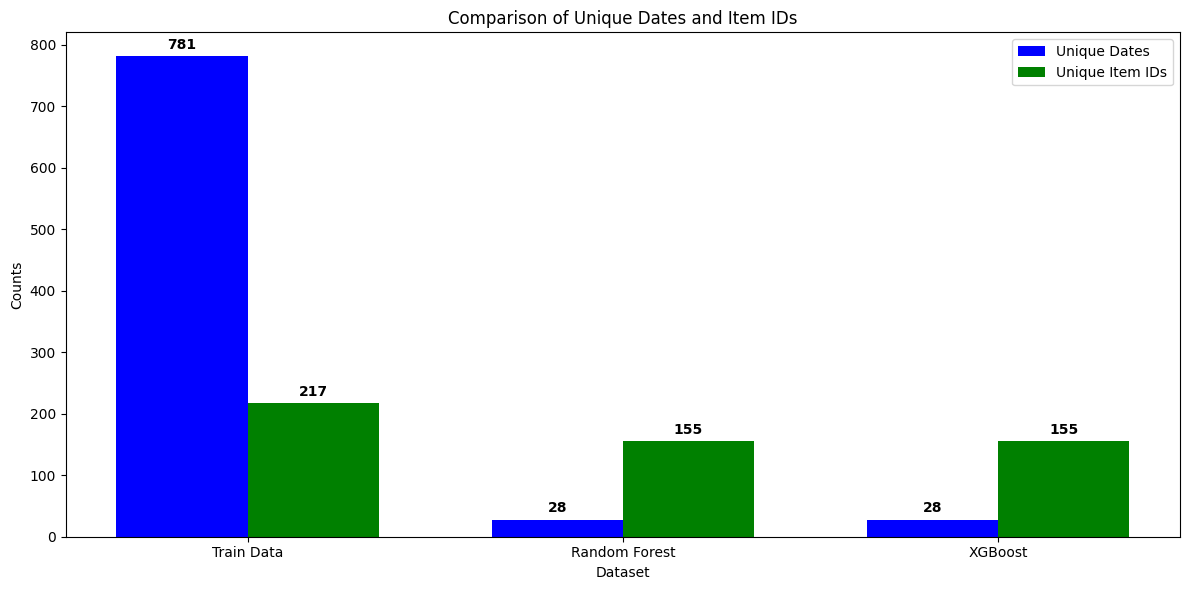

In [41]:
import numpy as np

# Unique values
unique_values = {
    'Unique Dates': [781, 28, 28],
    'Unique Item IDs': [217, 155, 155]
}
categories = ['Train Data', 'Random Forest', 'XGBoost']

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, unique_values['Unique Dates'], width, label='Unique Dates', color='blue')
rects2 = ax.bar(x + width/2, unique_values['Unique Item IDs'], width, label='Unique Item IDs', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Dataset')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Unique Dates and Item IDs')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding value labels on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

# Display the plot
plt.show()


## Merge the relevent columns

In [45]:
import pandas as pd

# Load the CSV files
random_forest_predictions_df = pd.read_csv('random_forest_predictions.csv')
train_df = pd.read_csv('train.csv')

# Ensure date columns are in the same format (if not, parse them to a consistent format)
random_forest_predictions_df['date'] = pd.to_datetime(random_forest_predictions_df['date'])
train_df['date'] = pd.to_datetime(train_df['date'])

# Find the unique 'Item Id' values in each dataset
predictions_item_ids = set(random_forest_predictions_df['Item Id'].unique())
train_item_ids = set(train_df['Item Id'].unique())

# Find the intersection of the two sets to identify common 'Item Id'
common_item_ids = predictions_item_ids.intersection(train_item_ids)

# Filter the datasets for only the common 'Item Id'
common_predictions_df = random_forest_predictions_df[random_forest_predictions_df['Item Id'].isin(common_item_ids)]
common_train_df = train_df[train_df['Item Id'].isin(common_item_ids)]

# Merge the datasets on 'Item Id' only to check for date discrepancies
merged_df = pd.merge(common_predictions_df, common_train_df[['Item Id', 'date', 'units']],
                     on='Item Id', how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())
# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_comparison_item_only.csv', index=False)

      Item Id     date_x  predicted_units     date_y  units
0  B09KDR64LT 2024-07-01              0.0 2022-04-27    0.0
1  B09KDR64LT 2024-07-01              0.0 2022-04-28    0.0
2  B09KDR64LT 2024-07-01              0.0 2022-04-29    0.0
3  B09KDR64LT 2024-07-01              0.0 2022-04-30    0.0
4  B09KDR64LT 2024-07-01              0.0 2022-05-01    0.0


## Calculate the MSE

In [47]:
import pandas as pd
from sklearn.metrics import mean_squared_error

# Load the CSV file
merged_comparison_df = pd.read_csv('merged_comparison_item_only.csv')

# Handle NaN values (replace with 0 for demonstration)
merged_comparison_df['units'].fillna(0, inplace=True)
merged_comparison_df['predicted_units'].fillna(0, inplace=True)

# Calculate the Mean Squared Error (MSE) between actual and predicted units
mse = mean_squared_error(merged_comparison_df['units'], merged_comparison_df['predicted_units'])

# Print the MSE
print(f"Mean Squared Error (MSE) between units and predicted_units: {mse}")

Mean Squared Error (MSE) between units and predicted_units: 40300.14705973295
